# Tennis Player Predictor

This Linear regression model predictis tennis player performance based on their playing habits. Using **tennis_stats.csv** we will be analyzing and modeling data from the Association of Tennis Professionals (ATP), this model identifies the key factors that contribute to becoming one of the world's top tennis players.

Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in **tennis_stats.csv**:

Identifying Data
- `Player` : name of the tennis player
- `Year` : year data was recorded
  
Service Game Columns (Offensive)
- `Aces` : number of serves by the player where the receiver does not touch the ball
- `DoubleFaults` : number of times player missed both first and second serve attempts
- `FirstServe` : % of first-serve attempts made
- `FirstServePointsWon` : % of first-serve attempt points won by the player
- `SecondServePointsWon`: % of second-serve attempt points won by the player
- `BreakPointsFaced`: number of times where the receiver could have won service game of the player
- `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
- `ServiceGamesPlayed`: total number of games where the player served
- `ServiceGamesWon`: total number of games where the player served and won
- `TotalServicePointsWon`: % of points in games where the player served that they won
  
Return Game Columns (Defensive)
- `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
- `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
- `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
- `ReturnGamesPlayed`: total number of games where the player’s opponent served
- `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
- `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
- `TotalPointsWon`: % of points won by the player

Outcomes
- `Wins`: number of matches won in a year
- `Losses`: number of matches lost in a year
- `Winnings`: total winnings in USD($) in a year
- `Ranking`: ranking at the end of year

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# load and investigate the data:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
offensive = ["Aces", "DoubleFaults", "FirstServe", "FirstServePointsWon", "SecondServePointsWon", "BreakPointsFaced", "BreakPointsSaved", "ServiceGamesPlayed", "ServiceGamesWon", "TotalServicePointsWon"]
defensive = ["FirstServeReturnPointsWon", "SecondServeReturnPointsWon","BreakPointsOpportunities", "BreakPointsConverted", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "TotalPointsWon"]
outcomes = ["Winnings"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

There are 1721 observations, 23 columns and no `null` values. The data types align with each variable so we are OK to begin exploratory analysis.

In [8]:
# perform exploratory analysis here:
df.describe(include = 'all')

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,NaN,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000


It looks like there may be an outlier for the max value of `Aces` but we will perform further analysis to explore

In [11]:
#checking to make sure there are no null values
df[df.isnull().any(axis=1)]


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking


['Player', 'Year', 'FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings', 'Ranking']


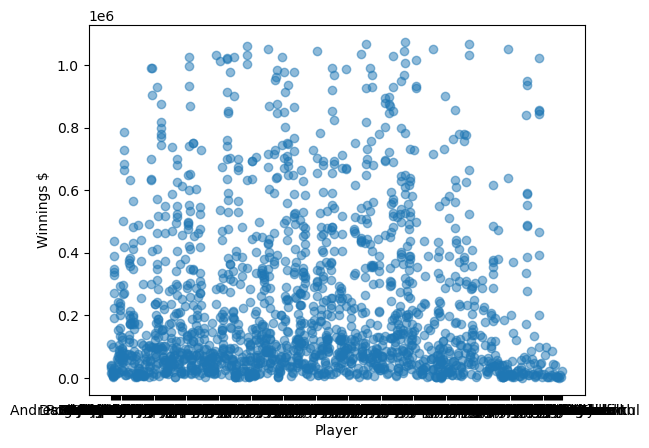

Correlation between Year and Winnings: 0.04390805106887372


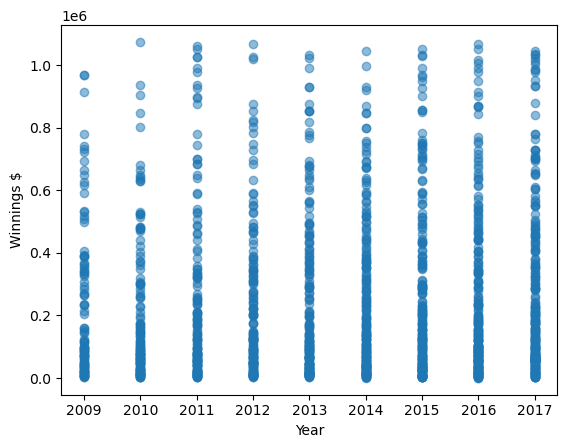

Correlation between FirstServe and Winnings: 0.05788214662085266


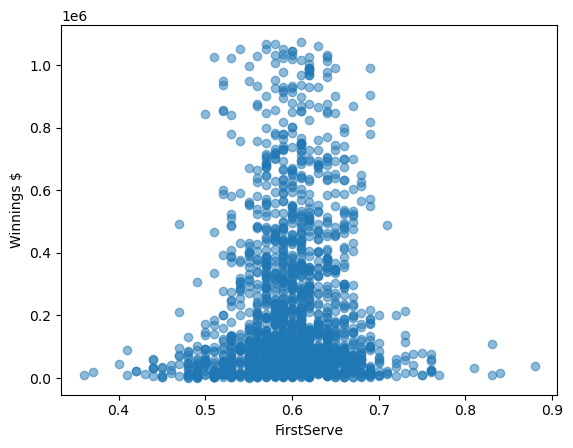

Correlation between FirstServePointsWon and Winnings: 0.36112105949290035


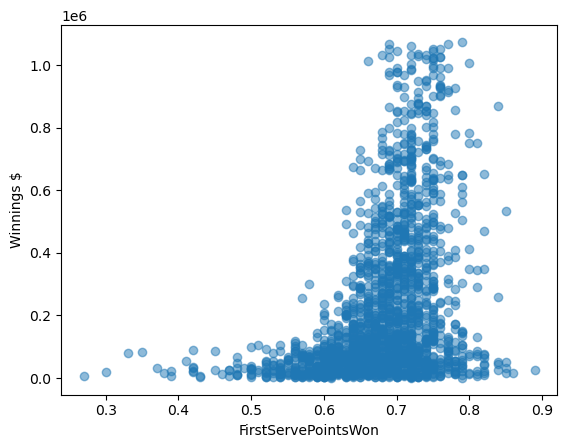

Correlation between FirstServeReturnPointsWon and Winnings: 0.24080834046115276


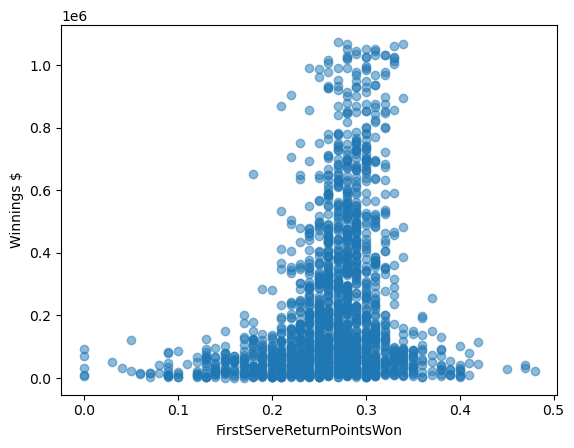

Correlation between SecondServePointsWon and Winnings: 0.28121480882884614


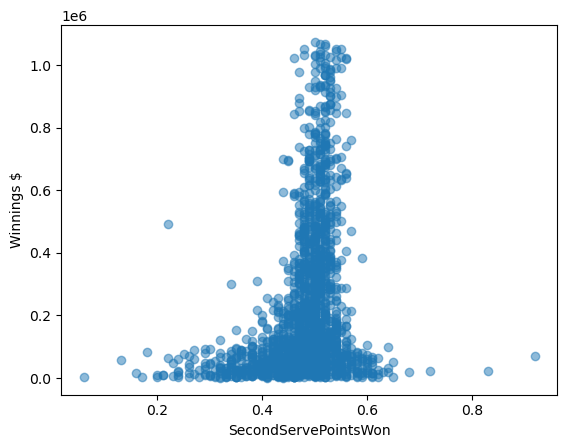

Correlation between SecondServeReturnPointsWon and Winnings: 0.1994012973607895


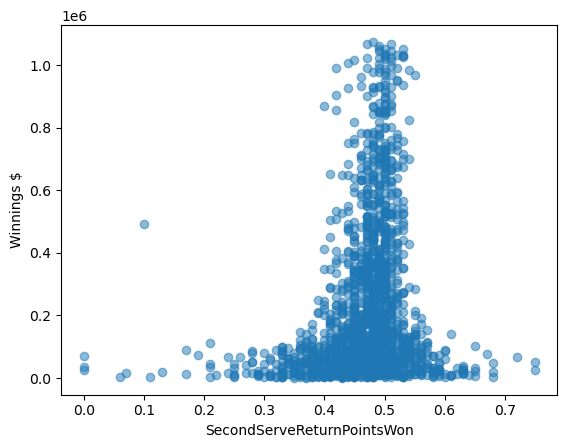

Correlation between Aces and Winnings: 0.7984043540699403


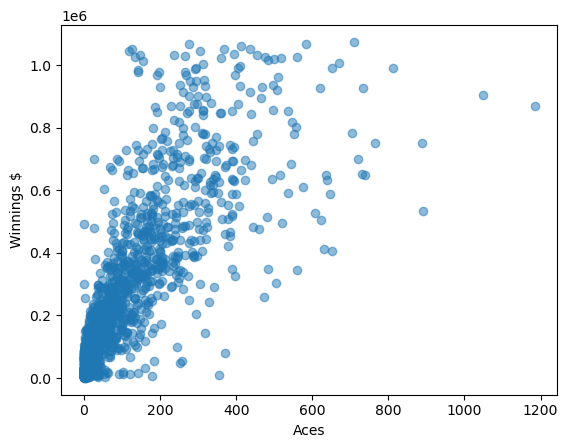

Correlation between BreakPointsConverted and Winnings: 0.0750221883156692


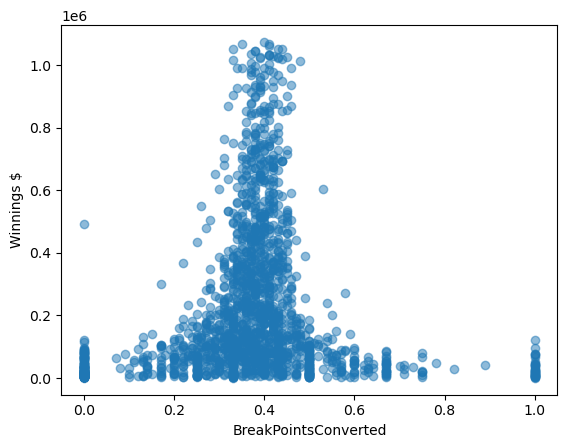

Correlation between BreakPointsFaced and Winnings: 0.8760356989199047


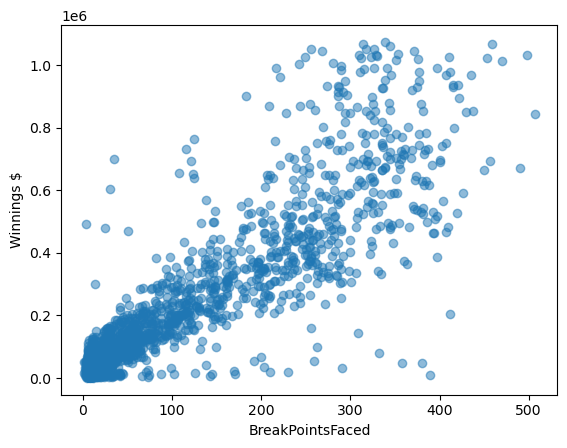

Correlation between BreakPointsOpportunities and Winnings: 0.9004439010037777


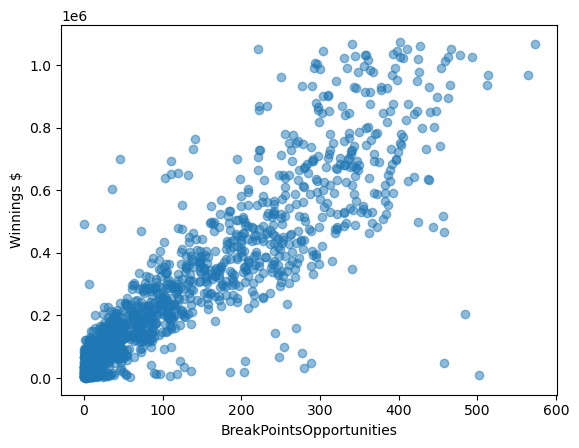

Correlation between BreakPointsSaved and Winnings: 0.25827077188659864


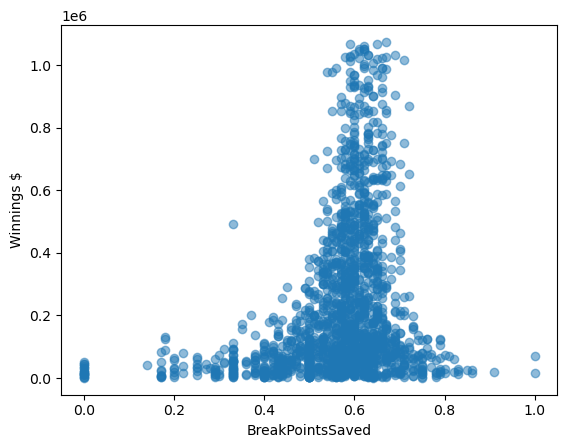

Correlation between DoubleFaults and Winnings: 0.8546851784438939


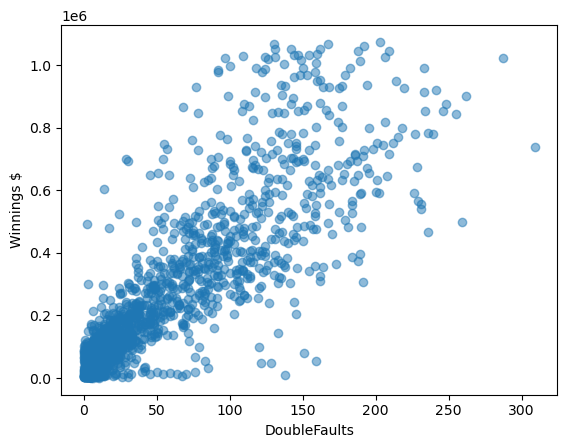

Correlation between ReturnGamesPlayed and Winnings: 0.9126126236635087


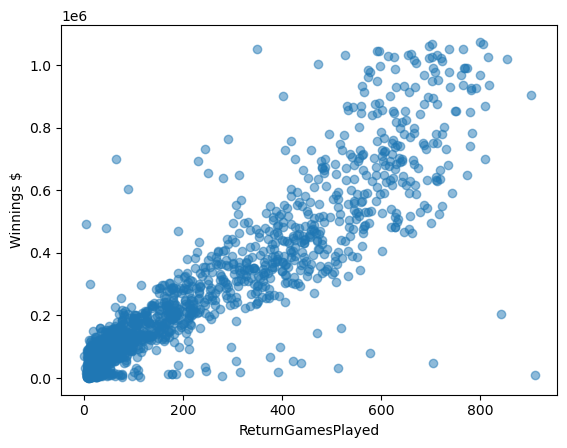

Correlation between ReturnGamesWon and Winnings: 0.27964505654930977


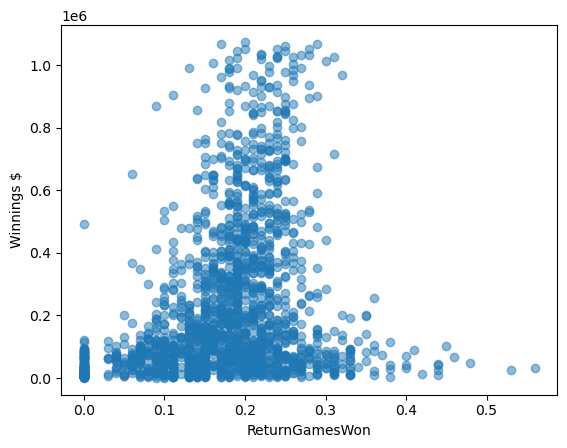

Correlation between ReturnPointsWon and Winnings: 0.2716459071831748


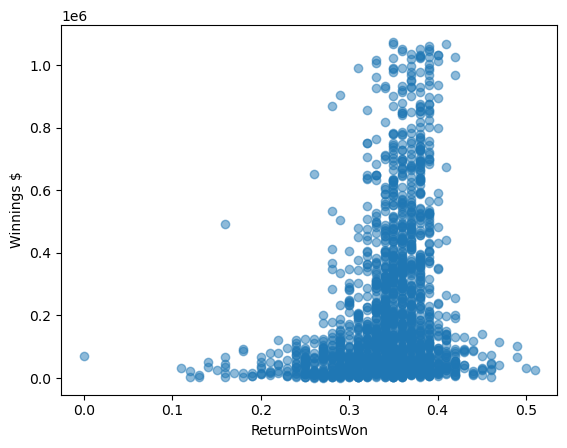

Correlation between ServiceGamesPlayed and Winnings: 0.912984937841333


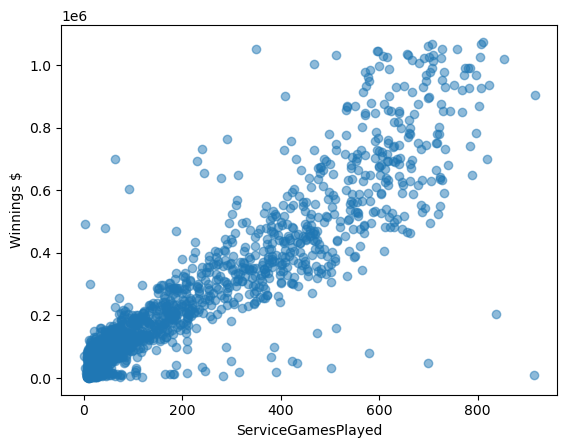

Correlation between ServiceGamesWon and Winnings: 0.39557717398518616


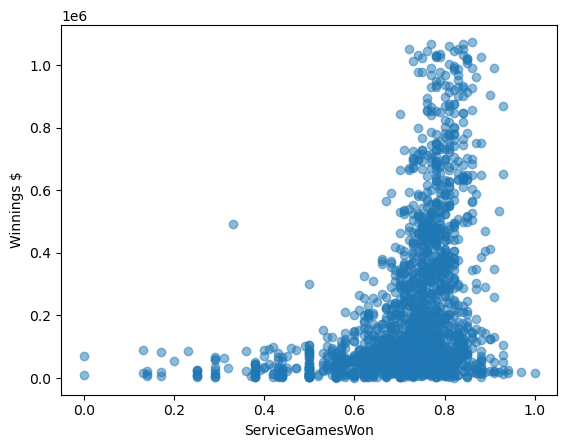

Correlation between TotalPointsWon and Winnings: 0.46106082878124993


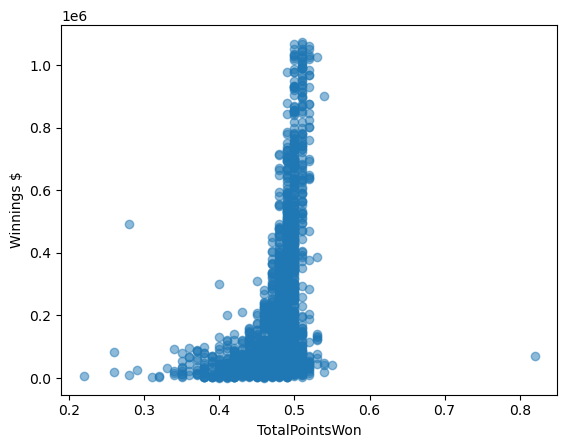

Correlation between TotalServicePointsWon and Winnings: 0.4077070018393834


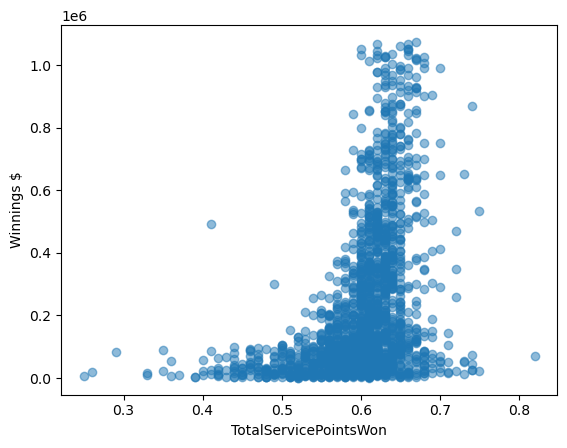

Correlation between Wins and Winnings: 0.9132973207773764


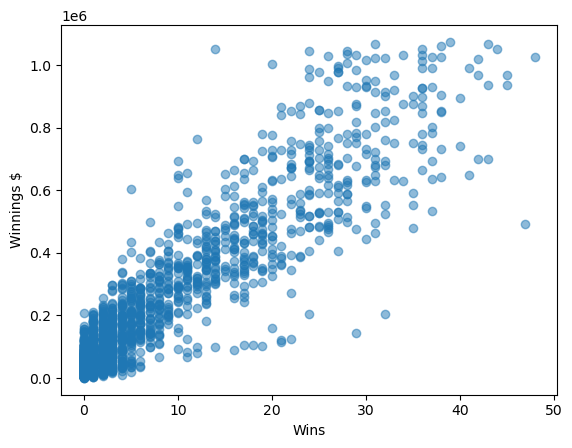

Correlation between Losses and Winnings: 0.8692767614021031


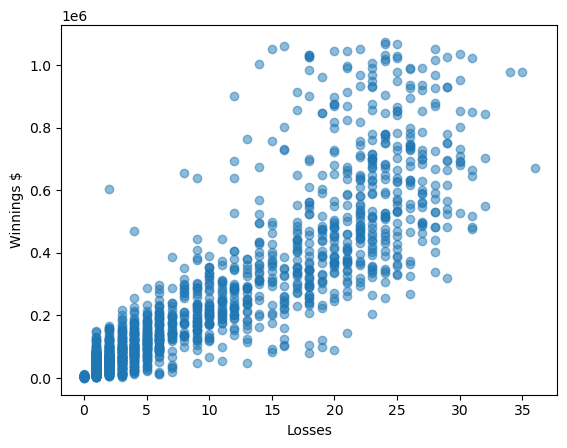

Correlation between Winnings and Winnings: 1.0


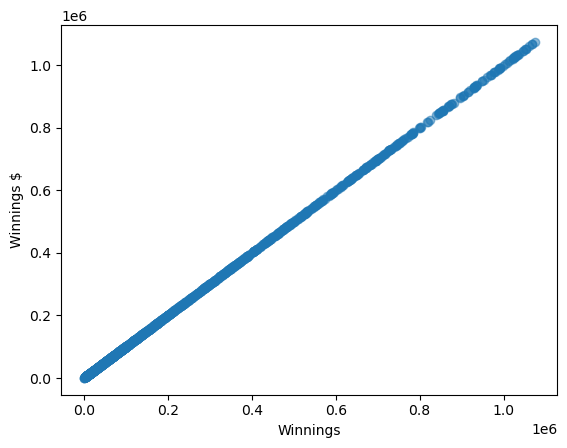

Correlation between Ranking and Winnings: -0.35983461266359024


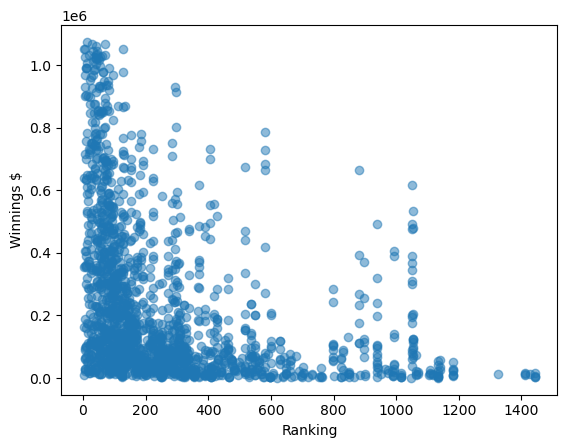

<Figure size 640x480 with 0 Axes>

In [13]:
columns = df.columns.tolist()
print(columns)
for column in columns:
    if column != 'Player':  # Skip the 'Player' column
        correlation, p = pearsonr(df[column], df['Winnings'])
        print(f"Correlation between {column} and Winnings: {correlation}")
    plt.scatter(x=column, y= 'Winnings', data=df, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Winnings $')
    plt.show()
    plt.clf()
    

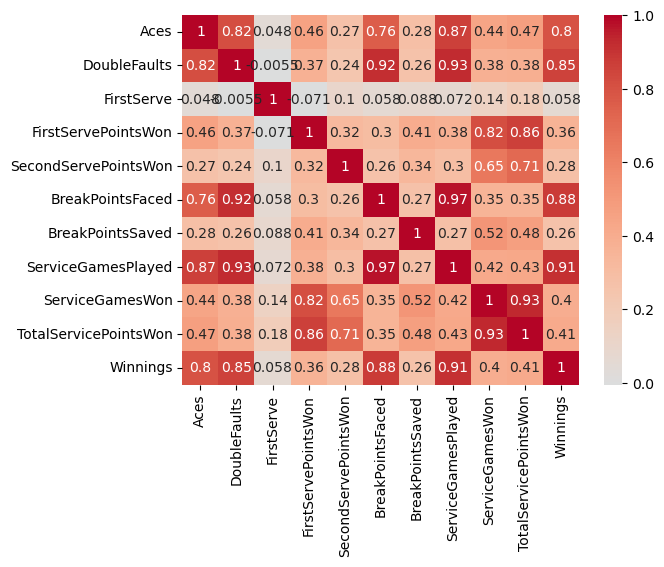

<Figure size 640x480 with 0 Axes>

In [18]:
#heatmap to test for multicollinearity
numeric_df = df[offensive+outcomes] #too many predictor variables, so we seperated
corr_matrix = numeric_df.corr()
# Create the heatmap
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, robust=True)
# Show the heatmap
plt.show()
plt.clf()

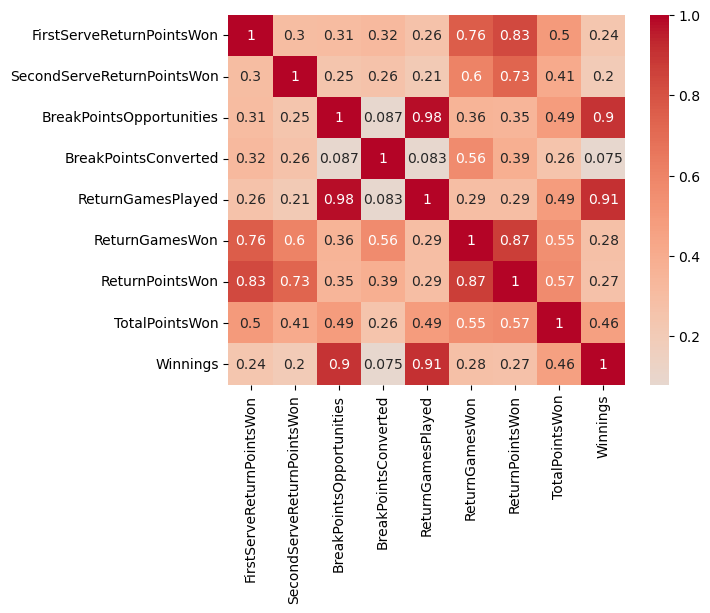

<Figure size 640x480 with 0 Axes>

In [20]:
#heatmap to test for multicollinearity
numeric_df = df[defensive+outcomes] #too many predictor variables, so we seperated
# Create the heatmap
corr_matrix = numeric_df.corr()
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, robust=True)
# Show the heatmap
plt.show()
plt.clf()

We aknowledge the presence of multicollinearity among certain variables, and would need to remove these variables from any regression model. However for this excersice, we are focused on testing the correlation of independent variables to the target variable, `Winnings`. From these two heatmaps we see high correlation between `Aces`, `DoubleFaults`, `BreakPointsFaced`,`ServiceGamesPlayed`,`BreakPointsOpportunities`, and `ReturnGamesPlayed`.

Predicting Winnings with Aces Test Score: 0.5830764522736536


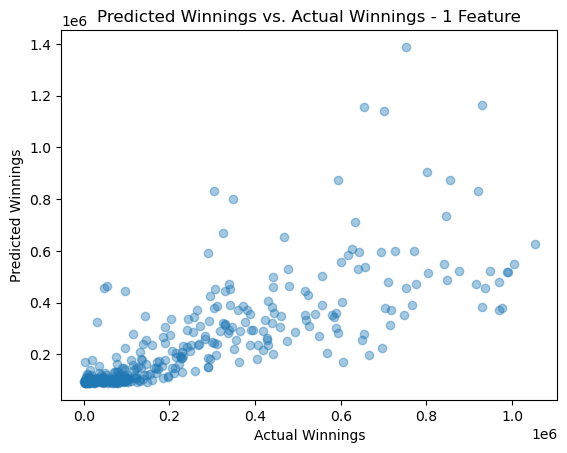

<Figure size 640x480 with 0 Axes>

In [23]:
##single feature linear regressions

aces = df[['Aces']]
winnings = df[['Winnings']]

aces_train, aces_test, winnings_train, winnings_test = train_test_split(aces, winnings, train_size = 0.8)

model = LinearRegression()
model.fit(aces_train,winnings_train)

# score model on test data
print('Predicting Winnings with Aces Test Score:', model.score(aces_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(aces_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

Predicting Winnings Test Score: 0.8238522917478575


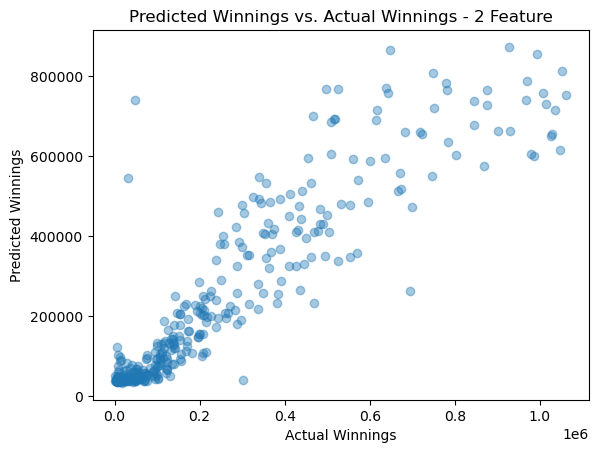

<Figure size 640x480 with 0 Axes>

In [25]:
## perform two feature linear regressions here:

twofeature = df[['Aces','ReturnGamesPlayed']]
winnings = df[['Winnings']]

twofeature_train, twofeature_test, winnings_train, winnings_test = train_test_split(twofeature, winnings, train_size = 0.8)

model = LinearRegression()
model.fit(twofeature_train,winnings_train)

# score model on test data
print('Predicting Winnings Test Score:', model.score(twofeature_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(twofeature_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

Just by adding one additional variable with high correlation we see the models accuracy score go from 58% to 82%.

Predicting Winnings Test Score: 0.8372934586172739


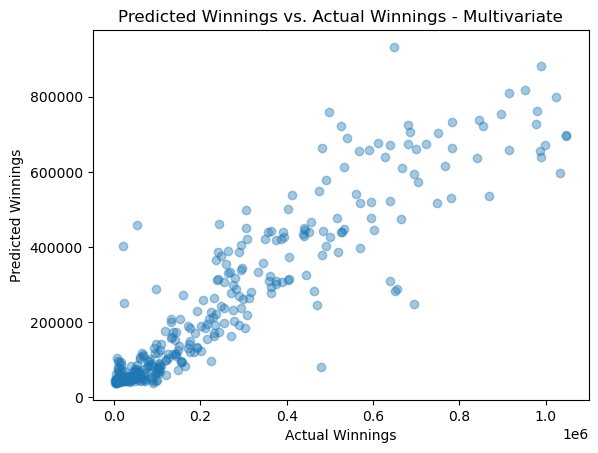

<Figure size 640x480 with 0 Axes>

In [29]:
## multivariate linear regressions
multifeature = df[['Aces','ReturnGamesPlayed','Aces', 'DoubleFaults', 
                 'BreakPointsFaced','ServiceGamesPlayed','BreakPointsOpportunities', 'ReturnGamesPlayed']]
winnings = df[['Winnings']]

multifeature_train, multifeature_test, winnings_train, winnings_test = train_test_split(multifeature, winnings, train_size = 0.8)

model = LinearRegression()
model.fit(multifeature_train,winnings_train)

# score model on test data
print('Predicting Winnings Test Score:', model.score(multifeature_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(multifeature_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multivariate')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

Our model can now predict winnings with a test score of 84%.